# Models - 125

In [2]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder


The main aim of this notebook is to train models for 125 dimension dataset. The architecture of these neural nets are same/similar to the best models for the 250 dimension dataset models


In [3]:
musicFeatures = pd.read_pickle("./musicFeatures_125.pkl")  

In [4]:
musicFeatures.shape

(53800, 22)

In [5]:
musicFeatures.head(3)

,id,genre,mfccFeature_0,mfccFeature_1,mfccFeature_2,mfccFeature_3,mfccFeature_4,mfccFeature_5,mfccFeature_6,mfccFeature_7,...,mfccFeature_10,mfccFeature_11,mfccFeature_12,mfccFeature_13,mfccFeature_14,themeFeature_0,themeFeature_1,themeFeature_2,themeFeature_3,themeFeature_4
0,124425_0,Folk,"[-370.79843, -241.48634, -194.38506, -180.8207...","[168.26068, 171.40137, 172.36029, 162.05092, 1...","[2.4880676, -7.24048, -4.496075, -2.001287, 1....","[55.600998, 64.33026, 60.984695, 55.507954, 53...","[15.535994, 18.283552, 18.782505, 17.862286, 2...","[-23.400375, -18.599773, -16.12199, -12.808086...","[6.832613, -2.5100358, -6.4472747, -4.7878127,...","[-20.754549, -22.908825, -16.086395, -6.894341...",...,"[2.9828172, -5.3308363, -9.059004, -10.516012,...","[7.389471, 10.391365, 9.164297, 12.626749, 15....","[-14.074498, -17.180588, -17.17708, -16.486225...","[-2.2356596, -2.4730246, -3.879704, -4.7021275...","[-5.7193613, -12.5987625, -13.566256, -14.7901...","[-2.7602386, 3.5225315, -7.9034977, -4.14859, ...","[-2.7488022, 1.5332724, -5.084736, -0.17479634...","[-3.637861, -2.6924672, -6.8108368, 0.60551977...","[-0.9171877, -0.34435138, -2.664367, 0.8348626...","[-0.67509335, 2.137695, -2.560794, -1.4792721,..."
1,124425_1,Folk,"[-175.72481, -133.18011, -132.39558, -148.3537...","[124.647224, 128.2229, 131.04869, 136.80539, 1...","[-59.10771, -69.087616, -77.83837, -81.74219, ...","[63.14617, 75.22435, 79.79401, 78.88486, 78.30...","[22.89666, 16.351116, 13.220872, 17.08419, 19....","[5.4199257, 1.1934371, 1.1466999, 2.601413, 7....","[3.633747, 3.698659, 0.37617093, -0.075065166,...","[0.92480415, 3.5748887, 1.6007254, -0.01360058...",...,"[-13.932665, -17.80704, -19.868145, -25.252512...","[2.7355022, 11.506807, 16.457325, 14.628165, 1...","[-4.7472696, -10.14241, -13.450586, -12.581228...","[-6.8696165, -10.429592, -15.328932, -16.63419...","[-13.287546, -15.832516, -14.91526, -15.437636...","[-2.7602386, 3.5225315, -7.9034977, -4.14859, ...","[-2.7488022, 1.5332724, -5.084736, -0.17479634...","[-3.637861, -2.6924672, -6.8108368, 0.60551977...","[-0.9171877, -0.34435138, -2.664367, 0.8348626...","[-0.67509335, 2.137695, -2.560794, -1.4792721,..."
2,124425_2,Folk,"[-176.67264, -169.07156, -143.76186, -116.9021...","[125.95861, 142.0693, 139.9425, 129.82358, 128...","[-42.819057, -54.282654, -66.28868, -74.820724...","[68.79902, 82.17572, 72.65663, 74.40225, 86.01...","[15.051884, 15.13154, 13.97467, 13.26046, 13.6...","[-5.963161, -10.348415, -11.131357, -8.049863,...","[18.740742, 19.350863, 7.428991, 2.5094814, -0...","[-11.269847, -7.254199, 2.556549, -0.36007375,...",...,"[-5.3846745, -10.779312, -21.197376, -19.87808...","[12.694374, 11.362453, 9.262964, 5.9032345, 1....","[3.3793998, -0.6741159, -1.3080653, -6.11729, ...","[-19.578459, -20.371014, -10.094763, -6.404214...","[-8.606797, -10.857103, -15.071583, -14.887018...","[-2.7602386, 3.5225315, -7.9034977, -4.14859, ...","[-2.7488022, 1.5332724, -5.084736, -0.17479634...","[-3.637861, -2.6924672, -6.8108368, 0.60551977...","[-0.9171877, -0.34435138, -2.664367, 0.8348626...","[-0.67509335, 2.137695, -2.560794, -1.4792721,..."


In [6]:
"""
Verifying all shapres and types of data
"""
print(musicFeatures.shape)
print('MFCC Features \n')
print(type(musicFeatures['mfccFeature_0'].iloc[0]))
print(len(musicFeatures['mfccFeature_0'].iloc[0]))
print(type(musicFeatures['mfccFeature_0'].iloc[0][0]))

print('Theme Features \n')
print(type(musicFeatures['themeFeature_0'].iloc[0]))
print(musicFeatures['themeFeature_0'].iloc[0].size)
print(type(musicFeatures['themeFeature_0'].iloc[0][0]))



(53800, 22)
MFCC Features 

<class 'numpy.ndarray'>
125
<class 'numpy.float64'>
Theme Features 

<class 'numpy.ndarray'>
125
<class 'numpy.float64'>


We split the dataset into x and y, y having the predicting columns

In [7]:
#Spliting x and y

y = musicFeatures['genre']
x = musicFeatures.loc[:, musicFeatures.columns != 'genre']
x = x.drop(['id'],axis =1)

print(x.shape)
print(y.shape)

(53800, 20)
(53800,)


Since we have an np array as in each cell, we need to reshape the data into a 3rd array for the network, we use the following function for the same.

In [8]:
def convertTo3DnpArray(df):
    new = []

    for index, row in df.iterrows():
        temp = []
        for i in row:
            temp.append(i)
        temp = np.stack(temp, axis=1)
        new.append(temp)
    new = np.stack(new, axis=0)
    
    return new

We split the dataset into train,test and valid which is of the ratio 80:10:10. Each model is trained on train and tested on test, once the best model is identified, we do a final validation on valid dataset.

In [9]:
#Train test valid split

x_train_temp, x_valid, y_train_temp, y_valid = train_test_split(x,y,test_size=0.1,random_state=12,stratify=y)
x_train, x_test, y_train, y_test = train_test_split(x_train_temp,y_train_temp,test_size=0.1/0.9,random_state=12,stratify=y_train_temp)

print('Final Sizes of all datasets')
print('x_train :',x_train.shape)
print('x_test :',x_test.shape)
print('x_valid :',x_valid.shape)
print('y_train :',y_train.shape)
print('y_test :',y_test.shape)
print('y_valid :',y_valid.shape)
print(' \n')

print('Value counts ')
print('y_train :')
print(y_train.value_counts())
print('y_test :')
print(y_test.value_counts())
print('y_valid :')
print(y_valid.value_counts())



Final Sizes of all datasets
x_train : (43040, 20)
x_test : (5380, 20)
x_valid : (5380, 20)
y_train : (43040,)
y_test : (5380,)
y_valid : (5380,)
 

Value counts 
y_train :
Rock            7640
Hip-Hop         6608
Experimental    6456
Folk            6448
Electronic      6384
Pop             4856
Instrumental    4648
Name: genre, dtype: int64
y_test :
Rock            955
Hip-Hop         826
Experimental    807
Folk            806
Electronic      798
Pop             607
Instrumental    581
Name: genre, dtype: int64
y_valid :
Rock            955
Hip-Hop         826
Experimental    807
Folk            806
Electronic      798
Pop             607
Instrumental    581
Name: genre, dtype: int64


Although the audio and theme features are numbers, they represent two different types of data. So we need to split them since the network will take them as two seperate inputs.

In [10]:
#splitting dataset into two parts

x_train_audio = convertTo3DnpArray(x_train.iloc[:,0:15])
x_test_audio = convertTo3DnpArray(x_test.iloc[:,0:15])
x_valid_audio = convertTo3DnpArray(x_valid.iloc[:,0:15])

x_train_theme = convertTo3DnpArray(x_train.iloc[:,15:])
x_test_theme = convertTo3DnpArray(x_test.iloc[:,15:])
x_valid_theme = convertTo3DnpArray(x_valid.iloc[:,15:])

print(x_train_audio.shape,x_train_theme.shape)

(43040, 125, 15) (43040, 125, 5)


In [11]:
x_train.iloc[:,0:15]

,mfccFeature_0,mfccFeature_1,mfccFeature_2,mfccFeature_3,mfccFeature_4,mfccFeature_5,mfccFeature_6,mfccFeature_7,mfccFeature_8,mfccFeature_9,mfccFeature_10,mfccFeature_11,mfccFeature_12,mfccFeature_13,mfccFeature_14
45426,"[-139.99445, -141.6547, -159.04424, -127.91515...","[143.8342, 144.74222, 119.7895, 93.61574, 110....","[-0.29467607, -5.69477, -10.923752, -16.675282...","[16.635662, 18.920792, 11.813884, 14.181473, 1...","[-0.7125869, 0.6533875, 14.571705, 30.434654, ...","[-11.17783, -4.5490384, -3.5991395, -0.6129981...","[-19.214766, -21.14454, -15.255355, -15.385834...","[3.6121345, 4.1450067, -2.355478, -12.152114, ...","[1.8349533, -0.14365649, 4.1016555, -3.178166,...","[4.709445, 9.571611, 13.020785, 11.836547, 12....","[-4.9977655, -4.808523, -0.4182424, -2.464945,...","[-4.5642505, -8.225264, -4.7574234, -2.7825675...","[4.742333, -1.8989537, -1.7160306, -3.3608122,...","[-3.571247, -2.9060082, 1.0518446, 11.059975, ...","[-9.428938, -10.673508, -10.558793, -7.925638,..."
61067,"[-32.424282, -37.5788, -53.909996, -43.977898,...","[97.8264, 83.48073, 69.719696, 69.11298, 61.95...","[26.42235, 29.175781, 24.808369, 22.333107, 21...","[38.51277, 63.396027, 83.998764, 80.17723, 80....","[9.27228, 10.613164, 11.966698, 5.706244, 6.35...","[20.284676, 31.592995, 38.398155, 39.675934, 4...","[11.87268, 12.174299, 2.4086628, 4.0864697, 2....","[9.663418, 14.070387, 16.931877, 17.82165, 17....","[8.742981, 6.247697, -4.0735874, -4.3767366, -...","[6.805999, 9.243203, 11.711779, 11.403246, 12....","[5.607091, 5.7106843, -0.32841438, -0.28301644...","[2.4778156, 7.033706, 14.346973, 12.293661, 12...","[-1.5391542, -2.5416205, -3.917673, -2.0291061...","[3.0518746, 2.9392257, 4.6551003, 4.050049, 3....","[0.27616298, -1.7185376, -8.498655, -12.03507,..."
46953,"[-166.80191, -157.71889, -194.90251, -230.092,...","[146.79947, 157.88794, 173.38678, 188.0593, 19...","[5.595789, -15.294285, -23.675728, -13.490566,...","[41.328224, 40.11194, 31.367783, 23.421118, 19...","[9.672446, 3.0326862, 3.3793495, 10.329123, 12...","[2.9876914, 4.198372, 4.833323, 6.493534, 8.45...","[-5.16506, -14.3373375, -12.536987, -2.2710304...","[2.818201, 2.3178158, -2.529229, -2.323248, -4...","[1.329654, 1.4666588, -1.8944976, -10.946783, ...","[-9.623087, -8.196696, -10.760681, -21.693773,...","[-14.100275, -24.133503, -25.510475, -12.26874...","[11.834452, 5.3015156, -5.626267, -10.964853, ...","[-5.150069, -8.529461, -13.803722, -13.864893,...","[-22.606815, -19.107742, -15.393628, -11.93380...","[6.884525, 5.5913825, 5.887105, 3.0444405, -2...."
34719,"[-73.75634, -33.514763, -38.36054, -39.72152, ...","[68.57895, 74.33246, 80.943085, 79.55659, 74.9...","[31.405579, 22.729992, 19.362732, 9.710659, -9...","[60.703407, 63.967854, 70.153694, 68.93184, 68...","[-5.9802732, -7.0878916, -2.9577403, 3.6416047...","[23.829746, 26.904804, 28.319157, 25.571663, 2...","[1.5111964, 0.7274799, -10.709931, -16.831581,...","[23.70816, 23.3013, 20.978199, 17.072632, 21.1...","[5.8681192, 1.2060777, 3.482767, 0.4606033, 0....","[14.276424, 14.983604, 18.62228, 21.5244, 19.4...","[-6.4868984, -6.787128, -2.4917607, 4.6058555,...","[3.91779, 8.756421, 12.148737, 11.481271, 10.2...","[-5.021801, -3.1423993, -4.3338437, -8.625853,...","[5.584846, 8.977827, 10.62542, 6.537366, 1.168...","[-10.410896, -11.286818, -5.952467, 1.2564542,..."
12214,"[-467.27948, -444.8546, -447.0554, -448.9548, ...","[93.31668, 86.13696, 78.32712, 77.583824, 82.9...","[30.308964, 26.872982, 20.917664, 22.023687, 2...","[18.48029, 19.063251, 18.545803, 15.772236, 13...","[-3.5972729, -4.4720945, -4.750284, -1.8411481...","[-16.408209, -10.284403, -6.94494, -3.9547918,...","[-15.925198, -13.731626, -13.126711, -14.22317...","[-4.0849037, -6.555113, -6.6290636, -8.3758545...","[-9.100562, -9.563753, -11.994759, -15.123742,...","[-2.0493908, -3.5360506, -9.6938, -10.682526, ...","[-6.173416, -14.02898, -19.409672, -20.459244,...","[-10.050282, -13.586306, -15.300538, -17.69638...","[-11.8860

We convert the y values into one hot encoded values.

In [12]:


ohe = OneHotEncoder()

y_valid = ohe.fit_transform(y_valid.values.reshape(-1, 1)).toarray()
y_train = ohe.fit_transform(y_train.values.reshape(-1, 1)).toarray()
y_test  = ohe.fit_transform(y_test .values.reshape(-1, 1)).toarray()

print('Verifying size')
print('y_train :',y_train.shape)
print('y_test :',y_test.shape)
print('y_valid :',y_valid.shape)


Verifying size
y_train : (43040, 7)
y_test : (5380, 7)
y_valid : (5380, 7)


In [15]:
from keras.models import Sequential,load_model
from keras.layers import Dense,Conv2D,MaxPooling2D,BatchNormalization,Dropout,Flatten,concatenate
import tensorflow as tf
from keras import Model
from keras.layers import Input, Dense, Bidirectional
import matplotlib.pyplot as plt
plt.style.use('ggplot')

The following function is used to plot the graphs for train and loss accuracy.

In [14]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Test acc')
    plt.title('Training and test accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Test loss')
    plt.title('Training and test loss')
    plt.legend()

We now train the best model from CNN archtecture, It contains 3 sets of convolutional, pooling and batch layers with minor regularization.

In [14]:
#Input layers
audio_in = Input(shape=(x_train_audio.shape[1], x_train_audio.shape[2], 1), name='audio_in')
theme_in = Input(shape=(x_train_theme.shape[1], x_train_theme.shape[2], 1), name='theme_in')



#Audio layer
audio_Conv1 = Conv2D(32, (3,3), activation='relu')(audio_in)
audio_Pool1 = MaxPooling2D((3,3), strides=(2,2), padding='same')(audio_Conv1)
audio_batch1 = BatchNormalization()(audio_Pool1)

audio_Conv2 = Conv2D(32, (3,3), activation='relu')(audio_batch1)
audio_Pool2 = MaxPooling2D((3,3), strides=(2,2), padding='same')(audio_Conv2)
audio_batch2 = BatchNormalization()(audio_Pool2)

audio_Conv3 = Conv2D(32, (2,2), activation='relu')(audio_batch2)
audio_Pool3 = MaxPooling2D((3,3), strides=(2,2), padding='same')(audio_Conv3)
audio_batch3 = BatchNormalization()(audio_Pool3)
audio_drop1 = Dropout(0.3)(audio_batch3)

audio_flatten1 = Flatten()(audio_drop1)
audio_dense = Dense(64, activation='relu')(audio_flatten1)


#Theme layer

theme_Conv1 = Conv2D(32, (3,3), activation='relu')(theme_in)
theme_Pool1 = MaxPooling2D((3,3), strides=(2,2), padding='same')(theme_Conv1)

theme_drop1 = Dropout(0.1)(theme_Pool1)

theme_flatten1 = Flatten()(theme_drop1)
theme_dense = Dense(64, activation='relu')(theme_flatten1)


#Concatenation 
concat = concatenate([audio_dense, theme_dense])
dense1 = Dense(64, activation='relu')(concat)
dense2 = Dense(32, activation='softmax')(dense1)
dense3 = Dense(16, activation='softmax')(dense2)
op = Dense(7, activation='softmax',name='op')(dense3)


model1 = Model(inputs=[audio_in,theme_in], outputs=[op])

model1.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 audio_in (InputLayer)          [(None, 125, 15, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d (Conv2D)                (None, 123, 13, 32)  320         ['audio_in[0][0]']               
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 62, 7, 32)    0           ['conv2d[0][0]']                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 62, 7, 32)   128         ['max_pooling2d[0][0]']      

Epoch 1/75
1345/1345 [==============================] - 32s 24ms/step - loss: 1.8716 - accuracy: 0.2254 - val_loss: 1.7763 - val_accuracy: 0.2985
Epoch 2/75
1345/1345 [==============================] - 30s 23ms/step - loss: 1.7122 - accuracy: 0.3301 - val_loss: 1.6232 - val_accuracy: 0.3792
Epoch 3/75
1345/1345 [==============================] - 30s 23ms/step - loss: 1.5830 - accuracy: 0.3816 - val_loss: 1.5469 - val_accuracy: 0.4169
Epoch 4/75
1345/1345 [==============================] - 30s 22ms/step - loss: 1.5281 - accuracy: 0.4166 - val_loss: 1.5007 - val_accuracy: 0.4424
Epoch 5/75
1345/1345 [==============================] - 31s 23ms/step - loss: 1.4442 - accuracy: 0.4673 - val_loss: 1.4149 - val_accuracy: 0.4825
Epoch 6/75
1345/1345 [==============================] - 34s 25ms/step - loss: 1.3668 - accuracy: 0.5056 - val_loss: 1.3020 - val_accuracy: 0.5342
Epoch 7/75
1345/1345 [==============================] - 34s 25ms/step - loss: 1.2882 - accuracy: 0.5461 - val_loss: 1.2942 -

Epoch 57/75
1345/1345 [==============================] - 28s 21ms/step - loss: 0.3735 - accuracy: 0.8784 - val_loss: 0.4916 - val_accuracy: 0.8388
Epoch 58/75
1345/1345 [==============================] - 28s 21ms/step - loss: 0.3707 - accuracy: 0.8813 - val_loss: 0.4546 - val_accuracy: 0.8546
Epoch 59/75
1345/1345 [==============================] - 29s 21ms/step - loss: 0.3608 - accuracy: 0.8840 - val_loss: 0.4863 - val_accuracy: 0.8472
Epoch 60/75
1345/1345 [==============================] - 34s 25ms/step - loss: 0.3625 - accuracy: 0.8835 - val_loss: 0.4720 - val_accuracy: 0.8506
Epoch 61/75
1345/1345 [==============================] - 36s 27ms/step - loss: 0.3572 - accuracy: 0.8843 - val_loss: 0.4737 - val_accuracy: 0.8457
Epoch 62/75
1345/1345 [==============================] - 28s 21ms/step - loss: 0.3514 - accuracy: 0.8890 - val_loss: 0.4756 - val_accuracy: 0.8513
Epoch 63/75
1345/1345 [==============================] - 28s 21ms/step - loss: 0.3502 - accuracy: 0.8878 - val_loss: 0

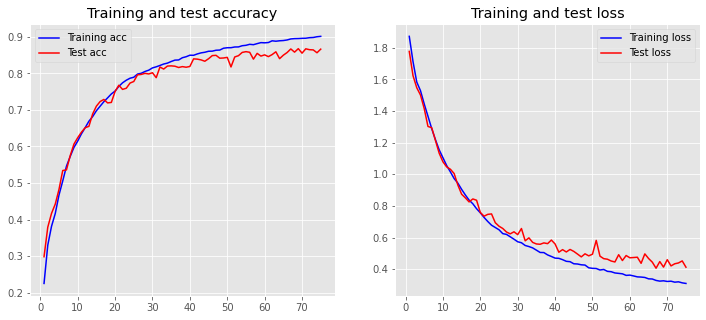

In [15]:
model1.compile(optimizer = 'adam',
                     loss='categorical_crossentropy',
                     metrics = ['accuracy']
                     )


h1=model1.fit({'audio_in': x_train_audio, 'theme_in': x_train_theme},{'op': y_train},
              epochs=75, batch_size=32,
            validation_data=({'audio_in': x_test_audio, 'theme_in': x_test_theme},{'op': y_test}))

model1.save('Best_Cnn_model')
plot_history(h1)

We now train the best model from RNN archtecture, It contains a mix of LSTM and GRU, LSTM layers for audio and GRU layers for theme.

In [18]:
from keras.layers import Dense,GRU,Flatten,concatenate,Dropout,LSTM

In [19]:
#Input layers
audio_in = Input(shape=(x_train_audio.shape[1], x_train_audio.shape[2]), name='audio_in')
theme_in = Input(shape=(x_train_theme.shape[1], x_train_theme.shape[2]), name='theme_in')



#Audio layer
audio_LSTM1 = LSTM(64,return_sequences=True)(audio_in)
audio_LSTM2 = LSTM(64)(audio_LSTM1)
audio_dense = Dense(64, activation='relu')(audio_LSTM2)


#Theme layer

theme_GRU1 = GRU(64,return_sequences=True)(theme_in)
theme_GRU2 = GRU(64)(theme_GRU1)
theme_dense = Dense(64, activation='relu')(theme_GRU2)


#Concatenation 
concat = concatenate([audio_dense, theme_dense])
dense1 = Dense(64, activation='relu')(concat)
dense2 = Dense(32, activation='relu')(dense1)
dense3 = Dense(16, activation='relu')(dense2)
op = Dense(7, activation='softmax',name='op')(dense3)


model2 = Model(inputs=[audio_in,theme_in], outputs=[op])

model2.summary()


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 audio_in (InputLayer)          [(None, 125, 15)]    0           []                               
                                                                                                  
 theme_in (InputLayer)          [(None, 125, 5)]     0           []                               
                                                                                                  
 lstm_2 (LSTM)                  (None, 125, 64)      20480       ['audio_in[0][0]']               
                                                                                                  
 gru_2 (GRU)                    (None, 125, 64)      13632       ['theme_in[0][0]']               
                                                                                            

Epoch 1/35
1345/1345 [==============================] - 58s 42ms/step - loss: 1.5256 - accuracy: 0.4289 - val_loss: 1.3734 - val_accuracy: 0.5017
Epoch 2/35
1345/1345 [==============================] - 56s 42ms/step - loss: 1.2300 - accuracy: 0.5591 - val_loss: 1.0965 - val_accuracy: 0.6056
Epoch 3/35
1345/1345 [==============================] - 56s 41ms/step - loss: 0.9242 - accuracy: 0.6757 - val_loss: 0.8162 - val_accuracy: 0.7184
Epoch 4/35
1345/1345 [==============================] - 56s 42ms/step - loss: 0.6879 - accuracy: 0.7591 - val_loss: 0.6564 - val_accuracy: 0.7714
Epoch 5/35
1345/1345 [==============================] - 56s 42ms/step - loss: 0.5643 - accuracy: 0.8020 - val_loss: 0.5660 - val_accuracy: 0.8058
Epoch 6/35
1345/1345 [==============================] - 56s 42ms/step - loss: 0.4937 - accuracy: 0.8278 - val_loss: 0.4945 - val_accuracy: 0.8225
Epoch 7/35
1345/1345 [==============================] - 56s 42ms/step - loss: 0.4315 - accuracy: 0.8486 - val_loss: 0.4678 -

INFO:tensorflow:Assets written to: Best_mixed_rnn_model\assets


INFO:tensorflow:Assets written to: Best_mixed_rnn_model\assets


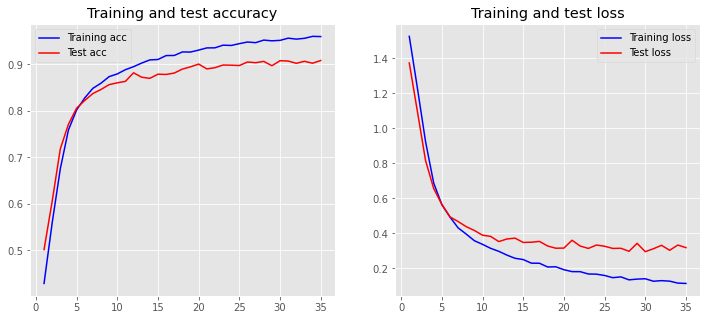

In [20]:

model2.compile(optimizer = 'adam',
                     loss='categorical_crossentropy',
                     metrics = ['accuracy']
                     )


h2=model2.fit({'audio_in': x_train_audio, 'theme_in': x_train_theme},{'op': y_train},
              epochs=35, batch_size=32,
            validation_data=({'audio_in': x_test_audio, 'theme_in': x_test_theme},{'op': y_test}))


model2.save('Best_mixed_rnn_model')


plot_history(h2)

We now train the best model from DNN archtecture, It is a long model with early flattening and minor dropouts

In [21]:
# Input layers
audio_in = Input(shape=(x_train_audio.shape[1], x_train_audio.shape[2]), name='audio_in')
theme_in = Input(shape=(x_train_theme.shape[1], x_train_theme.shape[2]), name='theme_in')

# Audio layer
audio_flat = Flatten()(audio_in) 
audio_dense1 = Dense(512, activation='relu')(audio_flat)
audio_dense2 = Dense(256, activation='relu')(audio_dense1)
audio_dense3 = Dense(128, activation='relu')(audio_dense2)
audio_dense4 = Dense(64, activation='relu')(audio_dense3)


# Theme layer
theme_flat = Flatten()(theme_in)
theme_dense1 = Dense(128, activation='relu')(theme_flat)
theme_dropout = Dropout(0.05)(theme_dense1)
theme_dense2 = Dense(64, activation='relu')(theme_dropout)

# Concatenate
concat = concatenate([audio_dense4, theme_dense2])
dense1 = Dense(128, activation='relu')(concat)
dense2 = Dense(128, activation='relu')(dense1)
dense3 = Dense(64, activation='relu')(dense2)
dense4 = Dense(32, activation='relu')(dense3)
dense5 = Dense(16, activation='relu')(dense4)
op = Dense(7, activation='softmax',name='op')(dense5)


model3 = Model(inputs=[audio_in, theme_in], outputs=[op])

model3.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 audio_in (InputLayer)          [(None, 125, 15)]    0           []                               
                                                                                                  
 flatten_2 (Flatten)            (None, 1875)         0           ['audio_in[0][0]']               
                                                                                                  
 theme_in (InputLayer)          [(None, 125, 5)]     0           []                               
                                                                                                  
 dense_15 (Dense)               (None, 512)          960512      ['flatten_2[0][0]']              
                                                                                            

Epoch 1/50
1345/1345 [==============================] - 7s 5ms/step - loss: 1.5307 - accuracy: 0.4354 - val_loss: 1.2183 - val_accuracy: 0.5634
Epoch 2/50
1345/1345 [==============================] - 6s 5ms/step - loss: 1.0329 - accuracy: 0.6335 - val_loss: 0.8719 - val_accuracy: 0.7006
Epoch 3/50
1345/1345 [==============================] - 6s 5ms/step - loss: 0.7783 - accuracy: 0.7291 - val_loss: 0.7033 - val_accuracy: 0.7478
Epoch 4/50
1345/1345 [==============================] - 6s 5ms/step - loss: 0.6620 - accuracy: 0.7680 - val_loss: 0.6099 - val_accuracy: 0.7764
Epoch 5/50
1345/1345 [==============================] - 6s 5ms/step - loss: 0.5901 - accuracy: 0.7922 - val_loss: 0.5746 - val_accuracy: 0.7961
Epoch 6/50
1345/1345 [==============================] - 7s 5ms/step - loss: 0.5384 - accuracy: 0.8081 - val_loss: 0.5611 - val_accuracy: 0.7968
Epoch 7/50
1345/1345 [==============================] - 7s 5ms/step - loss: 0.4968 - accuracy: 0.8213 - val_loss: 0.5107 - val_accuracy:

INFO:tensorflow:Assets written to: Best_dnn_model\assets


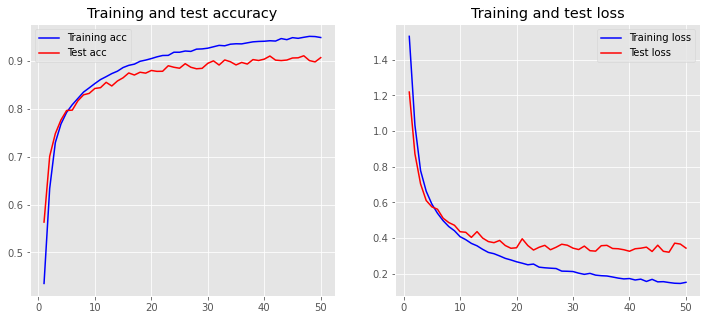

In [22]:
model3.compile(optimizer = 'adam',
                     loss='categorical_crossentropy',
                     metrics = ['accuracy']
                     )


h3=model3.fit({'audio_in': x_train_audio, 'theme_in': x_train_theme},{'op': y_train},
              epochs=50, batch_size=32,
            validation_data=({'audio_in': x_test_audio, 'theme_in': x_test_theme},{'op': y_test}))


model3.save('Best_dnn_model')


plot_history(h3)

We now train the best model from HYbrid archtecture, It uses CNN for audio and Rnn for Theme.

In [19]:
audio_in = Input(shape=(x_train_audio.shape[1], x_train_audio.shape[2], 1), name='audio_in')
theme_in = Input(shape=(x_train_theme.shape[1], x_train_theme.shape[2]), name='theme_in')



#Audio layer
audio_Conv1 = Conv2D(32, (3,3), activation='relu')(audio_in)
audio_Pool1 = MaxPooling2D((3,3), strides=(2,2), padding='same')(audio_Conv1)
audio_batch1 = BatchNormalization()(audio_Pool1)

audio_Conv2 = Conv2D(32, (3,3), activation='relu')(audio_batch1)
audio_Pool2 = MaxPooling2D((3,3), strides=(2,2), padding='same')(audio_Conv2)
audio_batch2 = BatchNormalization()(audio_Pool2)

audio_Conv3 = Conv2D(32, (2,2), activation='relu')(audio_batch2)
audio_Pool3 = MaxPooling2D((3,3), strides=(2,2), padding='same')(audio_Conv3)
audio_batch3 = BatchNormalization()(audio_Pool3)
audio_drop1 = Dropout(0.3)(audio_batch3)

audio_flatten1 = Flatten()(audio_drop1)
audio_dense = Dense(64, activation='relu')(audio_flatten1)


#Theme layer

theme_GRU1 = GRU(64,return_sequences=True)(theme_in)
theme_GRU2 = GRU(64)(theme_GRU1)
theme_dense = Dense(64, activation='relu')(theme_GRU2)

#Concatenation 
concat = concatenate([audio_dense, theme_dense])
dense1 = Dense(64, activation='relu')(concat)
dense2 = Dense(32, activation='relu')(dense1)
dense3 = Dense(16, activation='relu')(dense2)
op = Dense(7, activation='softmax',name='op')(dense3)


model4 = Model(inputs=[audio_in,theme_in], outputs=[op])

model4.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 audio_in (InputLayer)          [(None, 125, 15, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d_3 (Conv2D)              (None, 123, 13, 32)  320         ['audio_in[0][0]']               
                                                                                                  
 max_pooling2d_3 (MaxPooling2D)  (None, 62, 7, 32)   0           ['conv2d_3[0][0]']               
                                                                                                  
 batch_normalization_3 (BatchNo  (None, 62, 7, 32)   128         ['max_pooling2d_3[0][0]']    

Epoch 1/30
1345/1345 [==============================] - 81s 59ms/step - loss: 1.4712 - accuracy: 0.4584 - val_loss: 1.3433 - val_accuracy: 0.5197
Epoch 2/30
1345/1345 [==============================] - 81s 60ms/step - loss: 1.2272 - accuracy: 0.5605 - val_loss: 1.1226 - val_accuracy: 0.6097
Epoch 3/30
1345/1345 [==============================] - 79s 59ms/step - loss: 1.0129 - accuracy: 0.6411 - val_loss: 0.9706 - val_accuracy: 0.6589
Epoch 4/30
1345/1345 [==============================] - 78s 58ms/step - loss: 0.8117 - accuracy: 0.7150 - val_loss: 0.7405 - val_accuracy: 0.7455
Epoch 5/30
1345/1345 [==============================] - 78s 58ms/step - loss: 0.6553 - accuracy: 0.7713 - val_loss: 0.6463 - val_accuracy: 0.7771
Epoch 6/30
1345/1345 [==============================] - 79s 59ms/step - loss: 0.5437 - accuracy: 0.8115 - val_loss: 0.5617 - val_accuracy: 0.8078
Epoch 7/30
1345/1345 [==============================] - 79s 59ms/step - loss: 0.4754 - accuracy: 0.8342 - val_loss: 0.4776 -

INFO:tensorflow:Assets written to: Best_mix_model\assets


INFO:tensorflow:Assets written to: Best_mix_model\assets


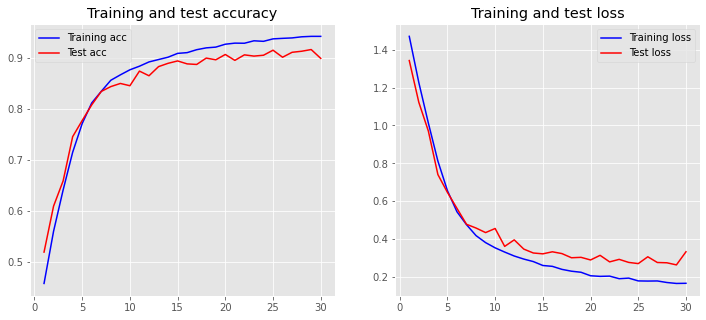

In [20]:


model4.compile(optimizer = 'adam',
                     loss='categorical_crossentropy',
                     metrics = ['accuracy']
                     )


h4=model4.fit({'audio_in': x_train_audio, 'theme_in': x_train_theme},{'op': y_train},
              epochs=30, batch_size=32,
            validation_data=({'audio_in': x_test_audio, 'theme_in': x_test_theme},{'op': y_test}))


model4.save('Best_mix_model')


plot_history(h4)

Evaluating all models

In [21]:
#Best model is model2

model1 = load_model('Best_Cnn_model')
model2 = load_model('Best_mixed_rnn_model')
model3 = load_model('Best_dnn_model')
model4 = load_model('Best_mix_model')

model1.evaluate({'audio_in': x_valid_audio, 'theme_in': x_valid_theme},{'op': y_valid})
model2.evaluate({'audio_in': x_valid_audio, 'theme_in': x_valid_theme},{'op': y_valid})
model3.evaluate({'audio_in': x_valid_audio, 'theme_in': x_valid_theme},{'op': y_valid})
model4.evaluate({'audio_in': x_valid_audio, 'theme_in': x_valid_theme},{'op': y_valid})

169/169 [==============================] - 4s 18ms/step - loss: 0.3119 - accuracy: 0.9011


[0.31193429231643677, 0.9011152386665344]